In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [139]:
df=pd.read_csv('/home/abinash-bir/ML/Project_rainfall/Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [140]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [141]:
df.dropna(inplace=True)

In [142]:
df.drop(columns=['mintemp','maxtemp','day'],inplace=True)

In [143]:
df.shape

(365, 9)

In [144]:
df.head()

,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,yes,0.0,40.0,13.7


In [145]:
df.info()

<class 'pandas.DataFrame'>
Index: 365 entries, 0 to 365
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       365 non-null    float64
 1   temparature    365 non-null    float64
 2   dewpoint       365 non-null    float64
 3   humidity       365 non-null    int64  
 4   cloud          365 non-null    int64  
 5   rainfall       365 non-null    str    
 6   sunshine       365 non-null    float64
 7   winddirection  365 non-null    float64
 8   windspeed      365 non-null    float64
dtypes: float64(6), int64(2), str(1)
memory usage: 28.5 KB


In [146]:
df.describe()

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1013.764658,23.735068,19.973425,80.161644,71.106849,4.413699,101.506849,21.536986
std,6.409697,5.635701,5.997768,10.071648,21.824024,3.938285,81.723724,10.069712
min,998.500000,4.900000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,18.800000,16.100000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,1013.000000,25.400000,21.900000,80.000000,80.000000,3.500000,70.000000,20.500000
75%,1018.100000,28.600000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,1034.600000,32.400000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


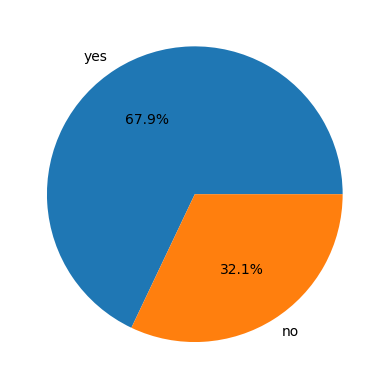

In [147]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [148]:
df.groupby('rainfall').mean()

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,
no,1014.576923,24.053846,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,1013.381452,23.584677,20.542742,83.540323,80.471774,2.916935,100.766129,22.604032


In [149]:
features = list(df.select_dtypes(include=np.number).columns)
if 'day' in features:
    features.remove('day')
print(features)

['pressure ', 'temparature', 'dewpoint', 'humidity ', 'cloud ', 'sunshine', 'winddirection', 'windspeed']


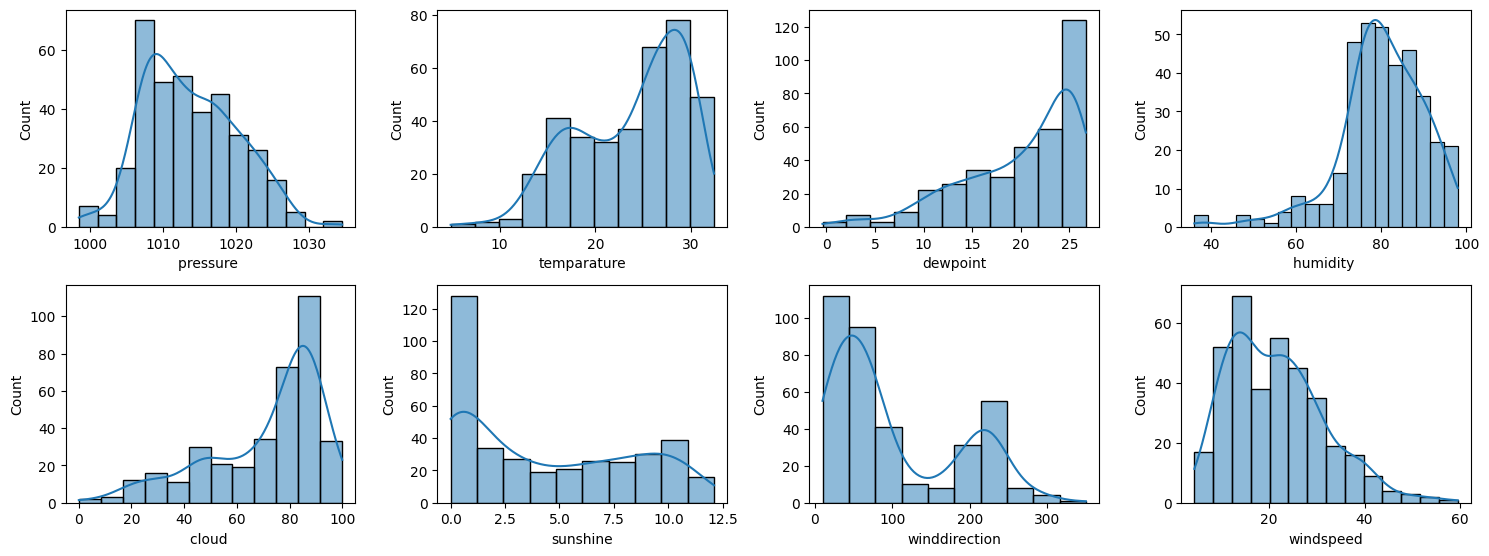

In [150]:
n = len(features)
cols = 4
rows = (n // cols) + 1

plt.figure(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True)

plt.tight_layout()
plt.show()

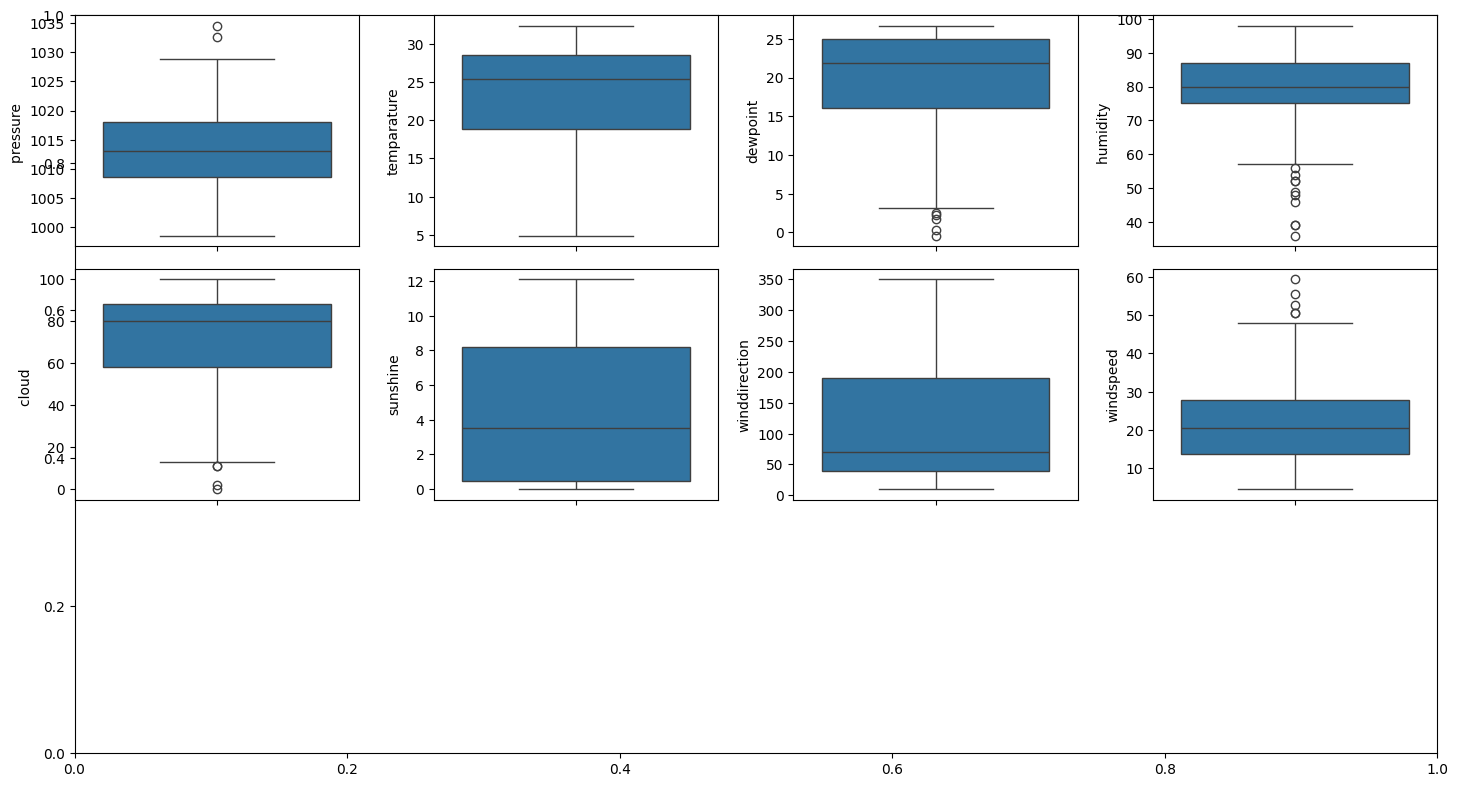

In [151]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

LABLR ENCODER

In [152]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df.drop('rainfall', axis=1)
Y = le.fit_transform(df['rainfall'])  # Encodes 'yes'/'no' to 1/0

OUTLIERS HANDLED

In [153]:

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

X = X.clip(lower, upper, axis=1)

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    stratify=Y,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)

(292, 8)
(73, 8)


MODEL DEFINING 

In [155]:
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "XGB": XGBClassifier(max_depth=3,learning_rate=0.05,n_estimators=200),#handled the overfitting
    "RandomForest": RandomForestClassifier(n_estimators=200,max_depth=6,min_samples_leaf=5),#handled the overfitting
    "DecisionTree": DecisionTreeClassifier(max_depth=4, min_samples_split=10),#handled the overfitting
    "KNN": KNeighborsClassifier(),
}

SCALEING

In [156]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TRAINING

In [157]:

for name, model in models.items():
    
    model.fit(X_train_scaled, Y_train)
    
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    train_prob = model.predict_proba(X_train_scaled)[:,1]
    test_prob = model.predict_proba(X_test_scaled)[:,1]
    
    print("========", name, "========")
    print("Train Accuracy:", accuracy_score(Y_train, train_pred))
    print("Test Accuracy:", accuracy_score(Y_test, test_pred))
    print("\n")
    

======== Logistic ========
Train Accuracy: 0.8082191780821918
Test Accuracy: 0.821917808219178


======== XGB ========
Train Accuracy: 0.9486301369863014
Test Accuracy: 0.7671232876712328


======== RandomForest ========
Train Accuracy: 0.8835616438356164
Test Accuracy: 0.8493150684931506


======== DecisionTree ========
Train Accuracy: 0.8801369863013698
Test Accuracy: 0.7808219178082192


======== KNN ========
Train Accuracy: 0.8527397260273972
Test Accuracy: 0.7945205479452054




In [162]:
#testing
custom_data = pd.DataFrame([[1018,25,20,85,70,2.5,60,18]],
                           columns=X_train.columns)

custom_scaled = scaler.transform(custom_data)

In [169]:
pred = models["Logistic"].predict(custom_data)[0]
print("Rain Prediction:", "Yes" if pred == 1 else "No")

Rain Prediction: No


/home/abinash-bir/ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [170]:
import joblib

joblib.dump(models, "all_models.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "columns.pkl")

['columns.pkl']